# Validating a good performance stock

In [2]:
import yfinance as yf
import pandas as pd

### I think an automated momemtum trade strategy should work better with index fund since we can filter out the news/sentiment of a particular stock. We want to take a look at this particular stock (NVDA) because it was the best performaning stock which went up most of the time over the last 1 year. It should be easy for the model to predict good entry point.

In [49]:
data = yf.download("NVDA", period='12mo')

[*********************100%%**********************]  1 of 1 completed


In [50]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-16,240.270004,255.880005,238.940002,255.410004,255.328094,58325300
2023-03-17,259.820007,263.989990,256.679993,257.250000,257.167542,84854700
2023-03-20,256.149994,260.239990,251.300003,259.000000,258.916962,43274700
2023-03-21,261.799988,263.920013,253.809998,261.989990,261.905975,54740800
2023-03-22,264.250000,275.890015,262.369995,264.679993,264.595123,79729500
2023-03-23,271.149994,274.989990,266.899994,271.910004,271.822815,56488900
2023-03-24,270.309998,271.670013,263.549988,267.790009,267.704132,45492000
2023-03-27,268.369995,270.000000,263.649994,265.309998,265.224945,36102600
2023-03-28,264.470001,265.130005,258.500000,264.100006,264.015320,35610400


## Problem statement

Given the last 5 days closing price (day1 to day5), if you buy at the opening on the next day (day6) , would you be able to make 3% gain in the next 5 days (day6 to day10) ? i.e., by just looking at the closing price of the last 5 days, should i place a trade on day6 with the hope of getting a 3% return on the next 5 days ? 

###  Create the input data frame. i.e. day1 to day5 dataframe

In [51]:
past_data = pd.DataFrame()

In [52]:
past_data['day1'] = data[['Close']].shift(9,axis=0)
past_data['day2'] = data[['Close']].shift(8,axis=0)
past_data['day3'] = data[['Close']].shift(7,axis=0)
past_data['day4'] = data[['Close']].shift(6,axis=0)
past_data['day5'] = data[['Close']].shift(5,axis=0)
past_data = past_data.reset_index()
past_data = past_data.drop(['Date'],axis=1)
past_data = past_data.drop([0,1,2,3,4,5,6,7,8,9])

In [53]:
past_data.head(10)

,day1,day2,day3,day4,day5
10,257.250000,259.000000,261.989990,264.679993,271.910004
11,259.000000,261.989990,264.679993,271.910004,267.790009
12,261.989990,264.679993,271.910004,267.790009,265.309998
13,264.679993,271.910004,267.790009,265.309998,264.100006
14,271.910004,267.790009,265.309998,264.100006,269.839996
15,267.790009,265.309998,264.100006,269.839996,273.829987
16,265.309998,264.100006,269.839996,273.829987,277.769989
17,264.100006,269.839996,273.829987,277.769989,279.649994
18,269.839996,273.829987,277.769989,279.649994,274.529999
19,273.829987,277.769989,279.649994,274.529999,268.809998


### get the maximum price the stock will reach on day6 to day10

In [54]:
future_data = pd.DataFrame()

In [55]:
future_data['day6'] = data[['High']].shift(4,axis=0)
future_data['day7'] = data[['High']].shift(3,axis=0)
future_data['day8'] = data[['High']].shift(2,axis=0)
future_data['day9'] = data[['High']].shift(1,axis=0)
future_data['day10'] = data[['High']]
future_data = future_data.reset_index()
future_data = future_data.drop(['Date'],axis=1)
future_data = future_data.drop([0,1,2,3,4,5,6,7,8,9])


In [56]:
future_data.head(5)

,day6,day7,day8,day9,day10
10,271.670013,270.000000,265.130005,270.779999,274.989990
11,270.000000,265.130005,270.779999,274.989990,278.339996
12,265.130005,270.779999,274.989990,278.339996,280.000000
13,270.779999,274.989990,278.339996,280.000000,280.000000
14,274.989990,278.339996,280.000000,280.000000,269.980011


In [57]:
next_five_days_max = pd.DataFrame()

In [58]:
next_five_days_max['future_max'] = future_data[["day6", "day7", "day8", "day9", "day10"]].max(axis=1)

### get the opening price of day 6

In [59]:
day6_open = pd.DataFrame()

In [60]:
day6_open['day6_open'] = data[['Open']].shift(4,axis=0)
day6_open = day6_open.reset_index()
day6_open = day6_open.drop(['Date'],axis=1)
day6_open = day6_open.drop([0,1,2,3,4,5,6,7,8,9])

In [61]:
day6_open.head(10)

,day6_open
10,270.309998
11,268.369995
12,264.470001
13,268.250000
14,272.290009
15,271.399994
16,275.089996
17,279.660004
18,268.290009
19,265.839996


### calculate the percentage gain from day6 open to the max from day6 to day10

In [62]:
gain_percent =pd.DataFrame()

In [63]:
next_five_days_max.head()

,future_max
10,274.989990
11,278.339996
12,280.000000
13,280.000000
14,280.000000


In [64]:
gain_percent['gain'] = next_five_days_max['future_max'] - day6_open['day6_open']
gain_percent['gain'] = gain_percent['gain']/day6_open['day6_open']

In [65]:
gain_percent.head()

,gain
10,0.017313
11,0.037150
12,0.058721
13,0.043802
14,0.028315


### this is the output trade or no trade on day6

In [66]:
trade = gain_percent['gain'] > 0.03

In [67]:
trade.head()

10    False
11     True
12     True
13     True
14    False
Name: gain, dtype: bool

## Try to idendify buy opportunities with KNN

In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [69]:
X_train, X_test, y_train, y_test = train_test_split(past_data, trade, random_state=42)


In [70]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

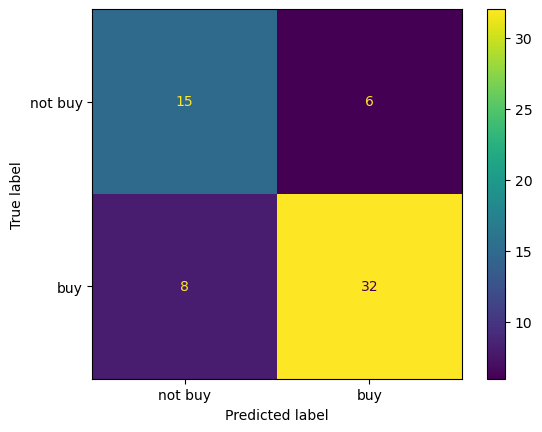

In [71]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn_preds = knn_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is really good results given it is the simplest model. It made correct dicision 32 times, and only make 6 mistake. 

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
log_pipe = Pipeline([('scale', StandardScaler()), ('log', LogisticRegression())])
log_pipe.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('log', LogisticRegression())])

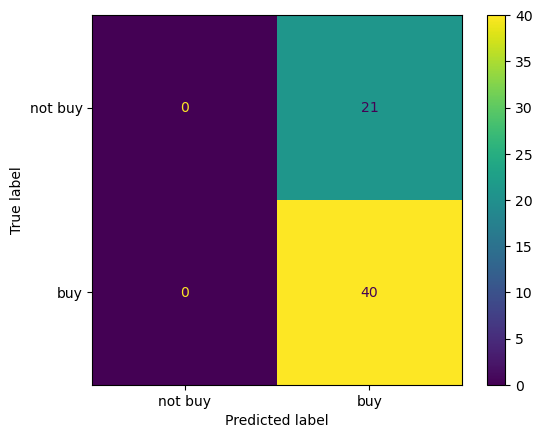

In [74]:
log_preds = log_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This model is not as great as KNN. It has more accurate predictions, but it also make more mistake. It is better to be more conservative for a trading strategy

## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
tree_pred = tree_model.predict(X_test)

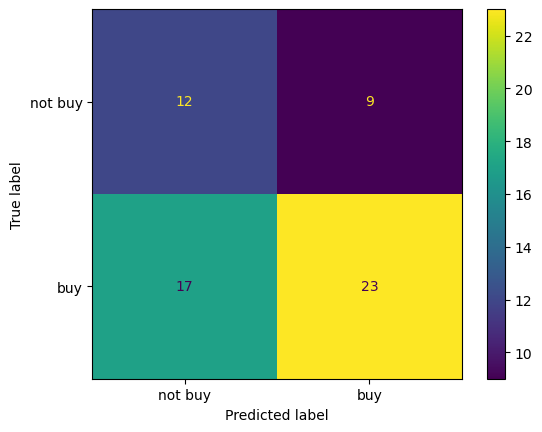

In [77]:
voo_confusion_mat = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is better than logistic regression, but still worse than KNN

## SVM

In [78]:
from sklearn.svm import SVC


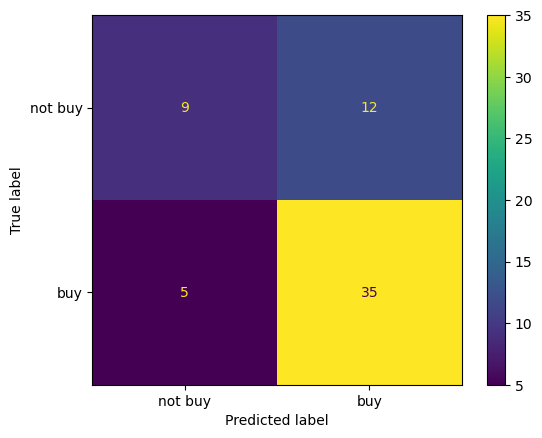

In [79]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()

This is still worse than KNN , but better than Logistic Regression and Decision Tree

## We can further improve the models by tuning some parameters

## Improve KNN

In [80]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']


In [81]:
best_k

13

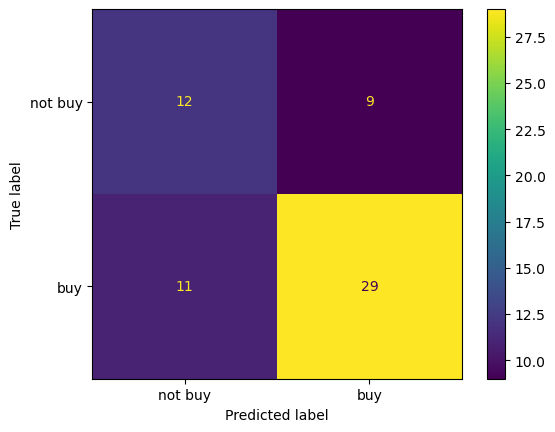

In [82]:
knn_new_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))])
knn_new_pipe.fit(X_train, y_train)
knn_new_preds = knn_new_pipe.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, knn_new_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()

## Improving Logistic Regression

In [83]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [84]:
import numpy as np

Cs = np.logspace(-2, 2)
coef_list = []

for C in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = C, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)
    coef_list.append(list(lgr.coef_[0]))
    print(lgr.coef_)


[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0.         0.         0.         0.01743181 0.        ]]
[[0.         0.         0.         0.04090725 0.        ]]
[[0.         0.         0.         0.06063087 0.        ]]
[[0.         0.         0.         0.07719302 0.        ]]
[[0.         0.         0.         0.09108515 0.        ]]
[[0.         0.         0.         0.10272414 0.        ]]
[[0.         0.         0.         0.11246338 0.        ]]
[[0.         0.         0.         0.12060159 0.        ]]
[[0.         0.         0.         0.12739449 0.        ]]
[[0.         0.         0.         0.13305734 0.        ]]
[[0.         0.         0.         0.13777685 0.        ]]
[[-0.06520626  0.          0.          0.20594433  0.        ]]
[[

In [85]:
np.logspace(-2, 2)

array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3.55648031e-01,
       4.29193426e-01, 5.17947468e-01, 6.25055193e-01, 7.54312006e-01,
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])

In [86]:
new_lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01, random_state=42, max_iter = 1000).fit(scaled_X_train, y_train)


In [87]:
new_log_preds = new_lgr.predict(scaled_X_test)


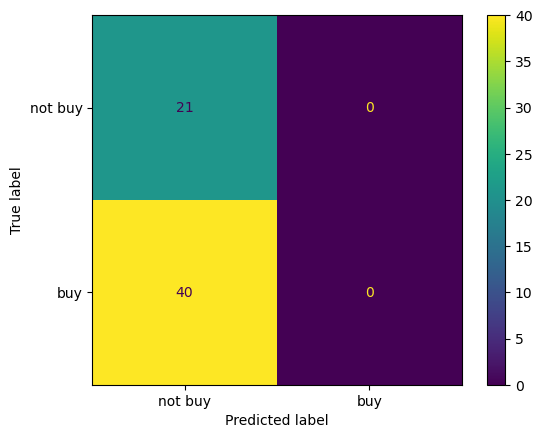

In [88]:
voo_confusion_mat = confusion_matrix(y_test, new_log_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


This is too conservative, we won't make any trade i.e. profit with this

## Improving Decision Tree


In [89]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

In [90]:
new_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)


In [91]:
new_tree_pred = new_tree_grid.predict(X_test)

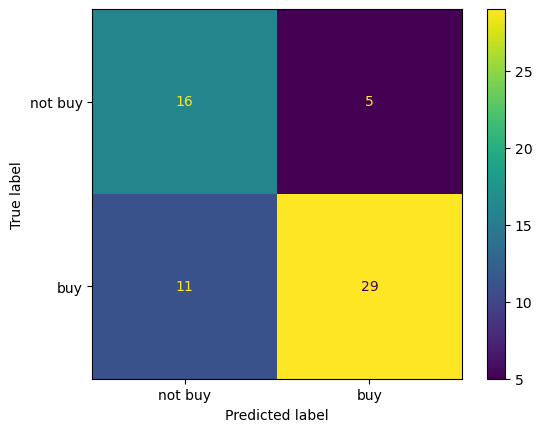

In [92]:
voo_confusion_mat = confusion_matrix(y_test, new_tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


The model has improved. It performs almost as good as KNN.

## Improving SVM

In [47]:
params = {'kernel': ['rbf', 'poly', 'linear', 'sigmoid']}

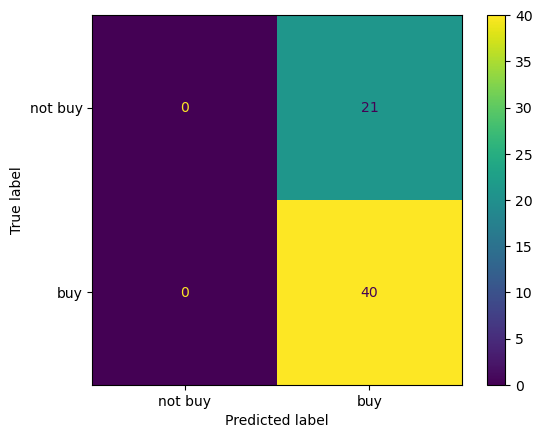

In [48]:
svc_grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
svc_grid.fit(X_train, y_train)
svc_new_pred = svc_grid.predict(X_test)
voo_confusion_mat = confusion_matrix(y_test, svc_new_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=voo_confusion_mat, display_labels=['not buy', 'buy' ])
disp.plot()
plt.show()


The model became more aggressive. It made more trade decision but also make more mistake

## From this analysis, for a stock that is consistently doing well. A simple KNN model will give us good short term trading decision. 